In [1]:
import nibabel as nib
import numpy as np
from nibabel import Nifti1Image
import matplotlib.pyplot as plt

In [2]:
image_path: str = "../data/raw/segmentations/1.2.826.0.1.3680043.10633.nii"
image_obj: Nifti1Image = nib.load(image_path)

print(f'Type of the image {type(image_obj)}.')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [5]:
image_data: np.memmap = image_obj.get_fdata()
type(image_data)

numpy.memmap

In [6]:
height, width, depth = image_data.shape

print(f'The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}.')

The image object has the following dimensions:
height=512
width=512
depth=429.


Plotting layer 239


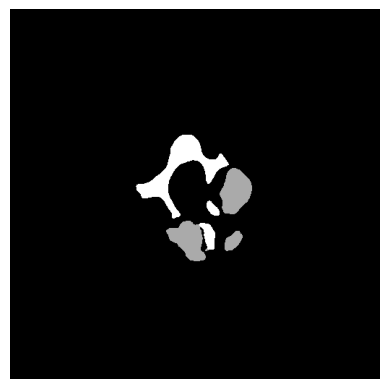

In [55]:
i = np.random.randint(depth-1)

print(f"Plotting layer {i}")

plt.imshow(image_data[:, :, i], cmap="gray")
plt.axis('off')
plt.show()

> A portion of the imaging datasets have been segmented automatically using a 3D UNET model, and radiologists modified and approved the segmentations. The provided segmentation labels have values of 1 to 7 for C1 to C7 (seven cervical vertebrae) and 8 to 19 for T1 to T12 (twelve thoracic vertebrae are located in the center of your upper and middle back), and 0 for everything else. As we focused on the cervical spine, all scans have C1 to C7 labels but not all thoracic labels.

<https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/data>

In [18]:
segmented_labels: dict = {
  "C1": 1,
  "C2": 2,
  "C3": 3,
  "C4": 4,
  "C5": 5,
  "C6": 6,
  "C7": 7,
  "T1": 8,
  "T2": 9,
  "T3": 10,
  "T4": 11,
  "T5": 12,
  "T6": 13,
  "T7": 14,
  "T8": 15,
  "T9": 16,
  "T10": 17,
  "T11": 18,
  "T12": 19,
  "ELSE": 0
}

np.unique(image_data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

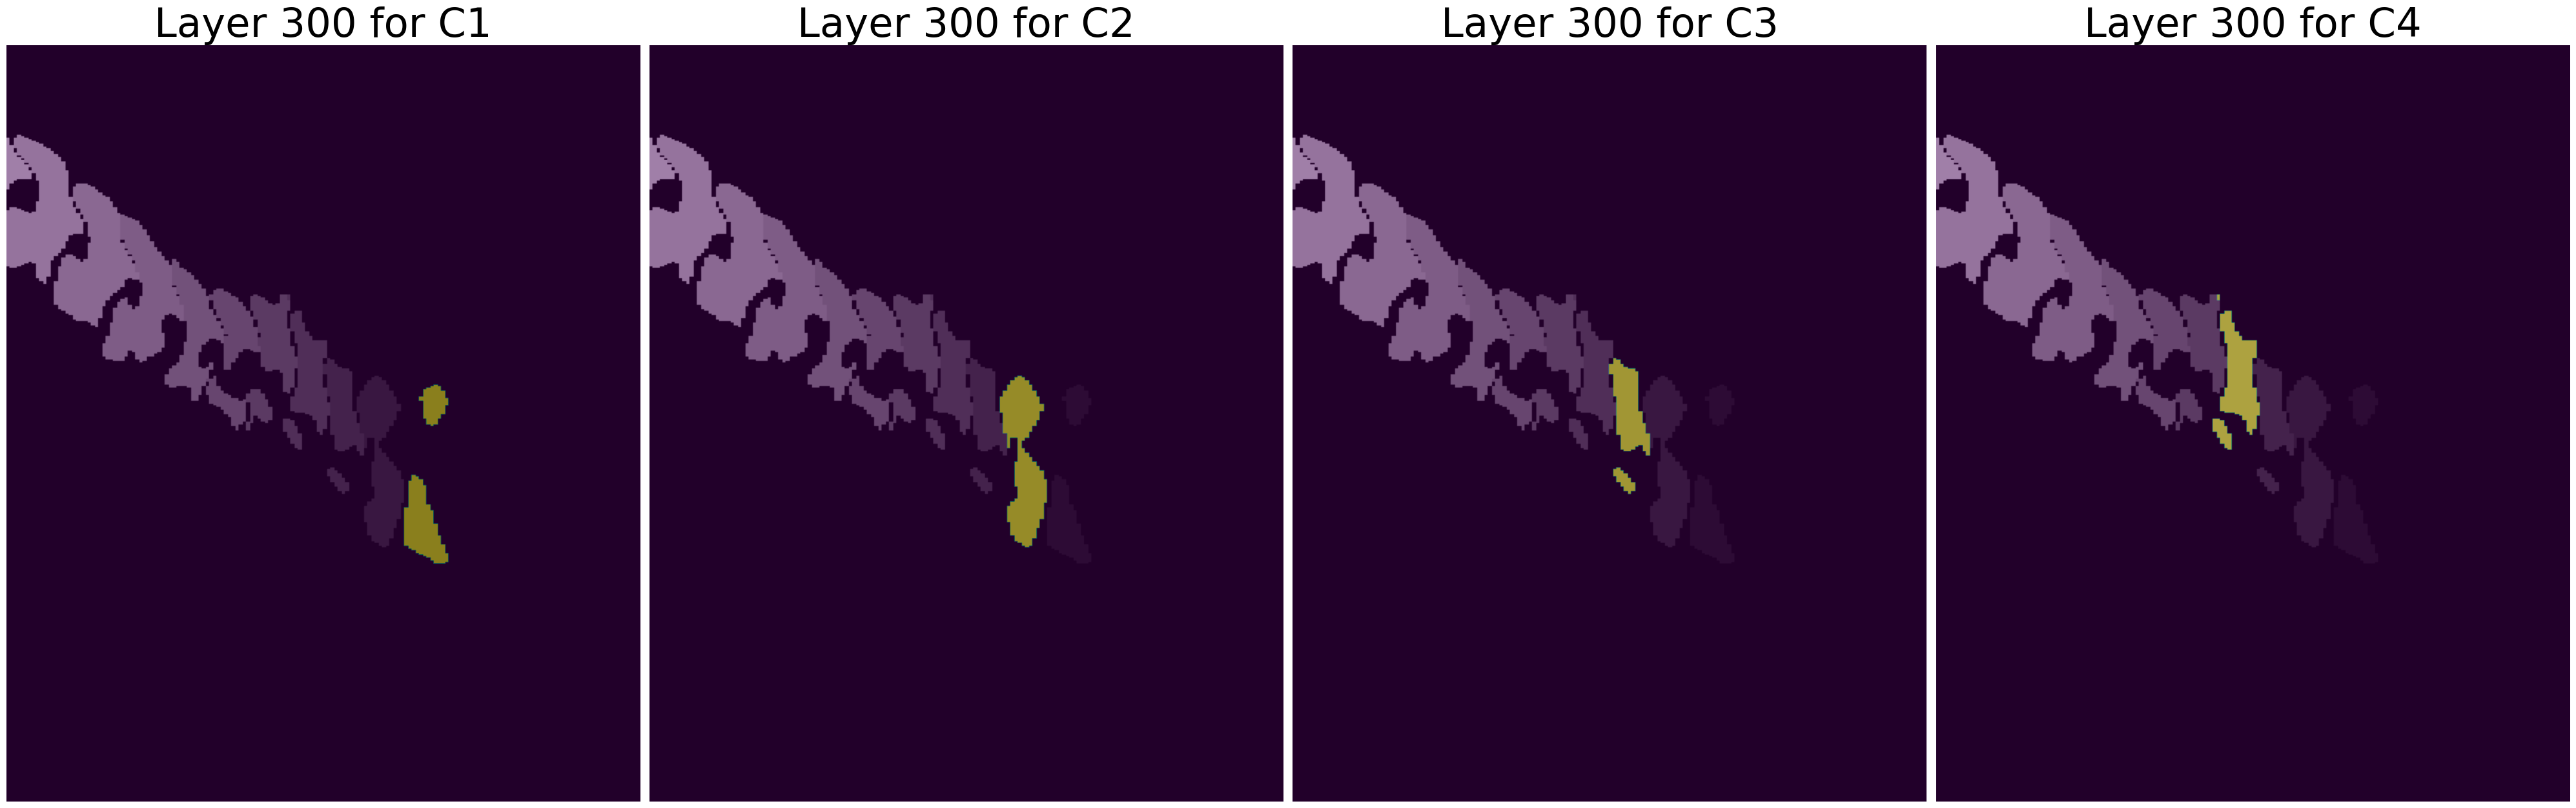

In [56]:
layer = 300

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(40,25))
for i in range(4):
  img_label_str = list(segmented_labels.keys())[i]
  img = image_data[layer, :, :]
  mask = np.where(img == segmented_labels[img_label_str], 255, 0)
  ax[i].imshow(mask)
  ax[i].imshow(image_data[layer, :, :], cmap="gray", alpha=0.5)
  ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
  ax[i].axis('off')
plt.tight_layout()
plt.show()